## Face recognition example

In [ ]:
# install cmake from https://cmake.org/download/ adding it to the path
# install desktop development tools for c++ from https://visualstudio.microsoft.com/visual-cpp-build-tools/  

# !pip install face_recognition
# !pip install opencv-python==4.6.0.66
# !pip install cmake
# !pip install Image
# !pip install dlib 

In [1]:
import dlib
from PIL import Image # (PIL = Python Image Library)
import face_recognition
import numpy as np
import sklearn
import cv2 # For resizing images
import numpy as np

In [2]:
import os
import zipfile

## Main function

#### So, this is the process:

<BR>1. We point to the folder that contains the zip files (only zip files will be included)
<BR>The zip file name is used as the "label"
<BR>2. For each file, the process attempts first to detect a face in the pic using face_recognition library
<BR>If it does not detect it, it would not include the image in the list
<BR>3. After, it crops it to the face itself
<BR>3. Then, resizes tha image to 128 x 128, since face_recognition uses a pre-trained neural network model (CNN) that requires all images to have the same size
<BR>4. Finally it converts the image into a numeric vector (this is called embedding), which represents key features of the face, such as the distance between eyes, jaw shape, nose, etc. So faces of similar faces will have embeddings close together in vector space.

In [3]:
def load_images_from_zip(directory):
    faces = [] # this list will store conversion of the original image in an object so that it can be used
    face_identities = [] #  this list will store names
    face_filenames = [] # this list will store filenames
    face_embeddings = [] #  this list will store the embeddings (numerical representation of a face in a vector space)
    
    # Iterate through each file in the directory
    for zip_filename in os.listdir(directory):
        if zip_filename.endswith(".zip"):
            zip_path = os.path.join(directory, zip_filename)
            print ("Processing zip file %s" % zip_path)
            with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                # Iterate through each file in the zip archive, discarding the __MACOSX folder that exists from Mac users
                for zip_info in zip_ref.infolist():
                    if zip_info.filename.find("__MACOSX") == -1 and (zip_info.filename.lower().endswith(".jpg") or 
                                                                     zip_info.filename.lower().endswith(".jpeg")): 
                        ## Read the image data from the zip archive
                        print (f"  Processing file {zip_info.filename}")
                        with zip_ref.open(zip_info) as image_file:
                            face = face_recognition.load_image_file(image_file)
                            face_locations = face_recognition.face_locations(face)
                            if len(face_locations) != 1:
                                print ("Skipping, because could not identify a face")
                                continue
                            else:
                                print ("Cropping according to face location")
                                top, right, bottom, left = face_locations[0]
                                face = face[top:bottom, left:right, :] # face is an array
                                face = np.array(face)
                                face = cv2.resize(face, dsize=(128,128), interpolation=cv2.INTER_CUBIC) # precise interpolation, although slower
                                pil_image = Image.fromarray(face) #this converts an array into a PIL image, that handles images in RGB format 
                                # and facilitates manipulations such as resize it, convert to grayscale, edit it and save to different formats
                                print (face.shape)
                                display(pil_image)
                                # now tries to convert the face image into a facial embedding (numeric feature vector). It returns a 128-dimensional vector list
                                try:
                                    embedding = face_recognition.face_encodings(face)[0] # only the first embedding if a face is detected
                                    print ("Success getting embedding")
                                except:
                                    print ("Failed getting embedding, skipping") #for instance, a face is not found
                                    continue
                                faces.append(face) # appends the face into the faces list
                                face_identities.append(zip_filename) # appends the zip file name into the identities list
                                face_filenames.append(zip_info.filename) # appends the face into the  files list
                                face_embeddings.append(embedding) # appends the face into the faces list
                                
    return faces, face_identities, face_filenames, face_embeddings

Now we call the function to load all images and try to detect faces

Processing zip file pics\Abdullah.zip
  Processing file Abdullah.jpg
Cropping according to face location
(128, 128, 3)


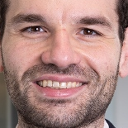

Success getting embedding
Processing zip file pics\Abdulrahman.zip
  Processing file Abdulrahman.jpg
Cropping according to face location
(128, 128, 3)


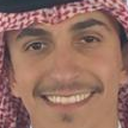

Success getting embedding
Processing zip file pics\Adrian.zip
  Processing file Adrian.jpg
Cropping according to face location
(128, 128, 3)


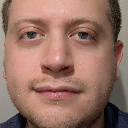

Success getting embedding
Processing zip file pics\Alejandro.zip
  Processing file Alejandro.jpg
Cropping according to face location
(128, 128, 3)


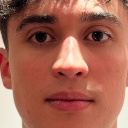

Success getting embedding
Processing zip file pics\AlejandroO.zip
  Processing file AlejandroO.jpg
Cropping according to face location
(128, 128, 3)


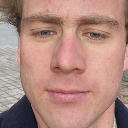

Success getting embedding
Processing zip file pics\Alvaro.zip
  Processing file Alvaroprof3.jpg
Cropping according to face location
(128, 128, 3)


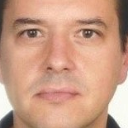

Success getting embedding
Processing zip file pics\Ana.zip
  Processing file Ana.jpeg
Cropping according to face location
(128, 128, 3)


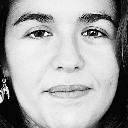

Success getting embedding
Processing zip file pics\Banderas.zip
  Processing file Banderas3.jpg
Cropping according to face location
(128, 128, 3)


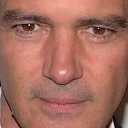

Success getting embedding
Processing zip file pics\Bellingham.zip
  Processing file bellingham.jpg
Cropping according to face location
(128, 128, 3)


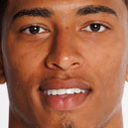

Success getting embedding
Processing zip file pics\BenAffleck.zip
  Processing file ben affleck3.jpg
Cropping according to face location
(128, 128, 3)


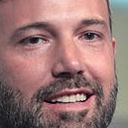

Success getting embedding
Processing zip file pics\Blanca.zip
Processing zip file pics\Brad-Pitt.zip
  Processing file Brad-Pitt.jpg
Cropping according to face location
(128, 128, 3)


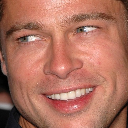

Success getting embedding
Processing zip file pics\CarlosSainzjr.zip
  Processing file CarlosSainzjr.jpg
Cropping according to face location
(128, 128, 3)


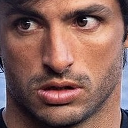

Success getting embedding
Processing zip file pics\Clara.zip
  Processing file Clara.jpg
Cropping according to face location
(128, 128, 3)


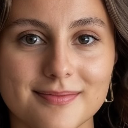

Success getting embedding
Processing zip file pics\Cristiano.zip
  Processing file Cristiano.jpg
Cropping according to face location
(128, 128, 3)


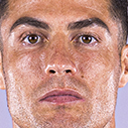

Success getting embedding
Processing zip file pics\Dhabia.zip
  Processing file Dhabia.jpg
Cropping according to face location
(128, 128, 3)


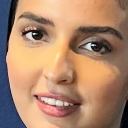

Success getting embedding
Processing zip file pics\Diego.zip
  Processing file foto_perfil.jpeg
Cropping according to face location
(128, 128, 3)


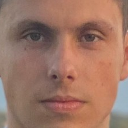

Success getting embedding
Processing zip file pics\Elton John.zip
  Processing file Elton John2.jpg
Cropping according to face location
(128, 128, 3)


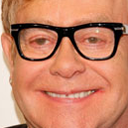

Failed getting embedding, skipping
Processing zip file pics\Emin.zip
  Processing file Emin.jpg
Cropping according to face location
(128, 128, 3)


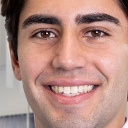

Success getting embedding
Processing zip file pics\Enrico.zip
  Processing file Enrico.jpg
Cropping according to face location
(128, 128, 3)


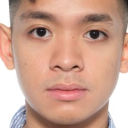

Success getting embedding
Processing zip file pics\Isabella_kid.zip
Processing zip file pics\Isabella_woman.zip
Processing zip file pics\JBalvin.zip
  Processing file blavin.jpg
Cropping according to face location
(128, 128, 3)


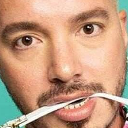

Success getting embedding
Processing zip file pics\Jennifer-Lawrence.zip
  Processing file jennifer-lawrence.jpg
Cropping according to face location
(128, 128, 3)


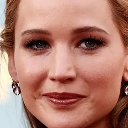

Success getting embedding
Processing zip file pics\Jerryseinfeld.zip
  Processing file jerryseinfeld3.jpg
Cropping according to face location
(128, 128, 3)


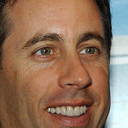

Success getting embedding
Processing zip file pics\JLopez.zip
  Processing file Jlopez1.jpg
Cropping according to face location
(128, 128, 3)


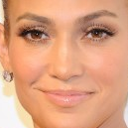

Success getting embedding
Processing zip file pics\Jonah-Hill.zip
  Processing file Jonah-Hill.jpg
Cropping according to face location
(128, 128, 3)


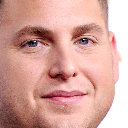

Success getting embedding
Processing zip file pics\Juan.zip
  Processing file Juan.jpeg
Cropping according to face location
(128, 128, 3)


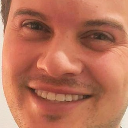

Success getting embedding
Processing zip file pics\Louis.zip
  Processing file Louis.jpg
Cropping according to face location
(128, 128, 3)


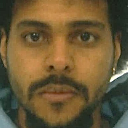

Success getting embedding
Processing zip file pics\Lucas.zip
  Processing file Lucas.jpg
Skipping, because could not identify a face
Processing zip file pics\Madona.zip
  Processing file Madona1.jpg
Cropping according to face location
(128, 128, 3)


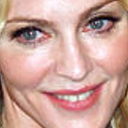

Success getting embedding
Processing zip file pics\Maine.zip
  Processing file Maine.jpg
Cropping according to face location
(128, 128, 3)


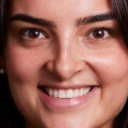

Success getting embedding
Processing zip file pics\Manuel.zip
  Processing file Manuel.jpg
Cropping according to face location
(128, 128, 3)


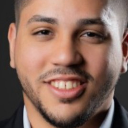

Success getting embedding
Processing zip file pics\Margarida.zip
  Processing file Margarida.jpeg
Cropping according to face location
(128, 128, 3)


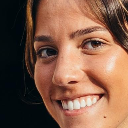

Success getting embedding
Processing zip file pics\Marta.zip
  Processing file Marta.jpg
Cropping according to face location
(128, 128, 3)


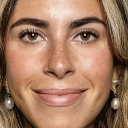

Success getting embedding
Processing zip file pics\Messi.zip
  Processing file Messi.jpg
Cropping according to face location
(128, 128, 3)


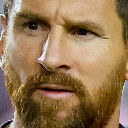

Success getting embedding
Processing zip file pics\Miguel.zip
  Processing file Miguel.jpg
Cropping according to face location
(128, 128, 3)


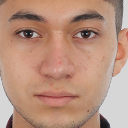

Success getting embedding
Processing zip file pics\Mohamud Ahmed.zip
  Processing file Mohamud Ahmed.jpg
Cropping according to face location
(128, 128, 3)


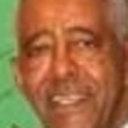

Success getting embedding
Processing zip file pics\PabloC.zip
  Processing file PabloC.jpg
Cropping according to face location
(128, 128, 3)


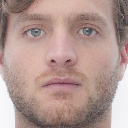

Success getting embedding
Processing zip file pics\Ricardo.zip
  Processing file Ricardo.jpg
Cropping according to face location
(128, 128, 3)


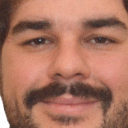

Success getting embedding
Processing zip file pics\Rihanna.zip
  Processing file Rihanna2.jpg
Cropping according to face location
(128, 128, 3)


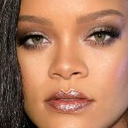

Success getting embedding
Processing zip file pics\Robert.zip
  Processing file Robert.jpeg
Cropping according to face location
(128, 128, 3)


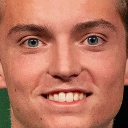

Success getting embedding
Processing zip file pics\Robertdeniro.zip
  Processing file Robertdeniro.jpeg
Cropping according to face location
(128, 128, 3)


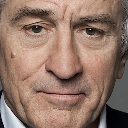

Success getting embedding
Processing zip file pics\Sam.zip
  Processing file Sam.jpg
Cropping according to face location
(128, 128, 3)


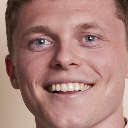

Success getting embedding
Processing zip file pics\Steve_Buscemi.zip
  Processing file Steve_Buscemi.jpg
Cropping according to face location
(128, 128, 3)


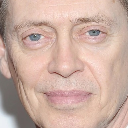

Success getting embedding
Processing zip file pics\Tomas.zip
  Processing file Tomas.jpg
Cropping according to face location
(128, 128, 3)


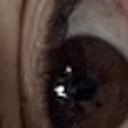

Failed getting embedding, skipping
Processing zip file pics\Tswift.zip
  Processing file TSwift3.jpg
Cropping according to face location
(128, 128, 3)


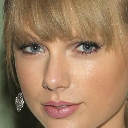

Success getting embedding
Processing zip file pics\Waldo.zip
  Processing file Waldo.jpg
Skipping, because could not identify a face
Processing zip file pics\Weekend.zip
  Processing file Weekend.jpg
Cropping according to face location
(128, 128, 3)


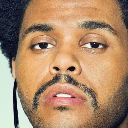

Success getting embedding
Processing zip file pics\WillemDafoe.zip
  Processing file WillemDafoe.jpg
Cropping according to face location
(128, 128, 3)


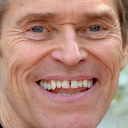

Success getting embedding
Processing zip file pics\Yeabshira.zip
  Processing file Yeabshira.jpeg
Cropping according to face location
(128, 128, 3)


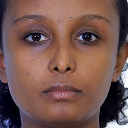

Success getting embedding
Numbef of pics loaded:  44


In [6]:
faces, identities, filenames, embeddings = load_images_from_zip("pics") # this is the folder where all zip files are stored

print("Numbef of pics loaded: ", len(faces))

The following will be used to find nearest neighbors of each face.
We choose n_neighbors=2 because the first neighbor is always going to be the image itself

### Finding closest neighbor (only one, you can increase the number)

In [7]:
num_neighbors=3
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=num_neighbors, algorithm='brute', metric='cosine').fit(embeddings)
nbrs

# Brute-force search compares each data point to all other points in the dataset to find nearest neighbours. 
# While it can be efficient for small datasets, it can become computationally expensive for large datasets due to the number of comparisons required.

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=3)

The following instruction will return two arrays. The first is a (n x k) array, with the [i,j] entry equaling the distance (cosine) of the i'th example to its j'the neighbor.<BR>
The second will be of the same shape (n x k), whith the [i,j] entry equaling the index of the j'th neighbor of i.  <BR>
If j=0, then we will always have value "i" at entry [i,0], because i is the closest to itself.

In [8]:
neighbors = nbrs.kneighbors(embeddings)
neighbors_2dec = np.round(neighbors, 4)
neighbors_2dec

array([[[ 0.    ,  0.0872,  0.1262],
        [ 0.    ,  0.0753,  0.0877],
        [ 0.    ,  0.088 ,  0.1042],
        [ 0.    ,  0.088 ,  0.1   ],
        [ 0.    ,  0.0928,  0.1154],
        [ 0.    ,  0.1024,  0.1068],
        [ 0.    ,  0.0822,  0.0952],
        [ 0.    ,  0.0916,  0.0997],
        [ 0.    ,  0.094 ,  0.109 ],
        [ 0.    ,  0.0898,  0.0976],
        [ 0.    ,  0.094 ,  0.0969],
        [ 0.    ,  0.0877,  0.1003],
        [ 0.    ,  0.0825,  0.0988],
        [ 0.    ,  0.0753,  0.0874],
        [ 0.    ,  0.0715,  0.0822],
        [ 0.    ,  0.0882,  0.0939],
        [ 0.    ,  0.1022,  0.1038],
        [ 0.    ,  0.0949,  0.105 ],
        [ 0.    ,  0.0898,  0.0916],
        [ 0.    ,  0.1082,  0.1176],
        [ 0.    ,  0.0889,  0.0928],
        [ 0.    ,  0.0766,  0.091 ],
        [ 0.    ,  0.0874,  0.0882],
        [ 0.    ,  0.0955,  0.1008],
        [ 0.    ,  0.0839,  0.0955],
        [ 0.    ,  0.0836,  0.0869],
        [ 0.    ,  0.0715,  0.1083],
 

The values are expressed in terms of distances: since we are using the cosine metric, the results obtained are 1-cosine. 
<BR>Therefore, the lower the value, the closer the similarity between faces

In [9]:
distances, indices = neighbors[0][:,1:],neighbors[1][:,1:]

n = len(indices)
if num_neighbors==2:
    for i in range(n):
        best_match = indices[i,0]
        print (f"Query face:  {identities[i]}  (file: {filenames[i]}) \n best match: {identities[best_match]}  (file: {filenames[best_match]})\n")

else:
    for i in range(n):
        best_match = indices[i,0]
        print (f"Query face:  {identities[i]}  (file: {filenames[i]}) \n best match: {identities[best_match]}  (file: {filenames[best_match]})")
        if num_neighbors>2:
            secondbest_match = indices[i,1]
            print (f"2nd best match: {identities[secondbest_match]}  (file: {filenames[secondbest_match]})\n")


Query face:  Abdullah.zip  (file: Abdullah.jpg) 
 best match: Ricardo.zip  (file: Ricardo.jpg)
2nd best match: Messi.zip  (file: Messi.jpg)

Query face:  Abdulrahman.zip  (file: Abdulrahman.jpg) 
 best match: Cristiano.zip  (file: Cristiano.jpg)
2nd best match: CarlosSainzjr.zip  (file: CarlosSainzjr.jpg)

Query face:  Adrian.zip  (file: Adrian.jpg) 
 best match: Alejandro.zip  (file: Alejandro.jpg)
2nd best match: Miguel.zip  (file: Miguel.jpg)

Query face:  Alejandro.zip  (file: Alejandro.jpg) 
 best match: Adrian.zip  (file: Adrian.jpg)
2nd best match: Manuel.zip  (file: Manuel.jpg)

Query face:  AlejandroO.zip  (file: AlejandroO.jpg) 
 best match: Jerryseinfeld.zip  (file: jerryseinfeld3.jpg)
2nd best match: Robertdeniro.zip  (file: Robertdeniro.jpeg)

Query face:  Alvaro.zip  (file: Alvaroprof3.jpg) 
 best match: JBalvin.zip  (file: blavin.jpg)
2nd best match: BenAffleck.zip  (file: ben affleck3.jpg)

Query face:  Ana.zip  (file: Ana.jpeg) 
 best match: Dhabia.zip  (file: Dhabia.j